In [1]:
#!pip install --upgrade pandas -q
!pip install --upgrade pandas-datareader -q

     |████████████████████████████████| 109 kB 5.2 MB/s 


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [3]:
%cd /content/drive/MyDrive/Stock Prediction

/content/drive/MyDrive/Stock Prediction


In [4]:
step = 100
start = '2000-01-01'
end = '2021-11-11'

stock_input = input('Enter Stock')
df = web.DataReader(stock_input, 'yahoo', start, end)

Enter StockAAPL


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-05,152.199997,150.059998,151.889999,151.279999,65414600.0,151.279999
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998
2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.869995


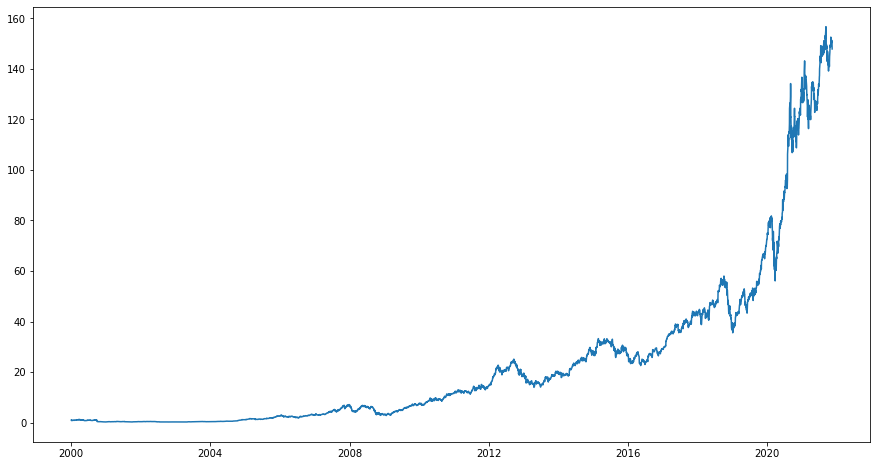

In [6]:
fig = plt.figure(figsize = (15, 8))
plt.plot(df.Close)
plt.show()

In [7]:
indicators = pd.DataFrame()

AttributeError: ignored

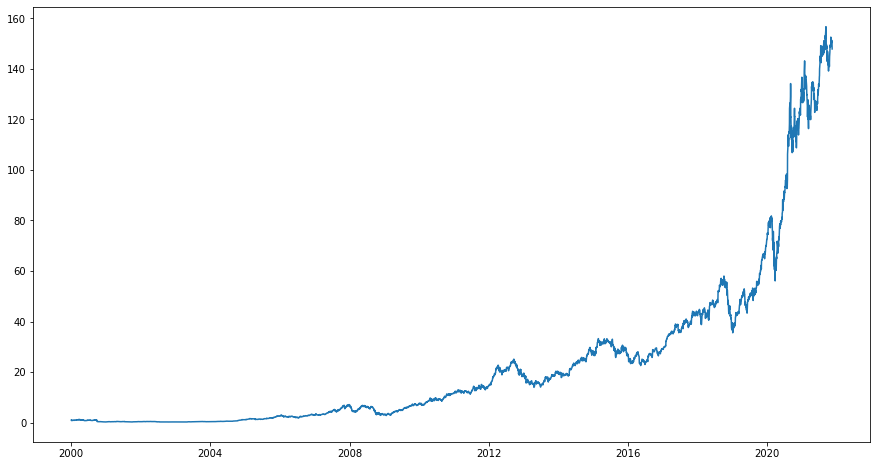

In [8]:
def ma(df, period = 30):
  return df.Close.rolling(period).mean()
indicators['MA'] = ma(df)
fig = plt.figure(figsize = (15, 8))
plt.plot(df.Close)
plt.plot(indicators.EMA, color = 'r')
plt.show()

In [ ]:
def ema(df, period = 30):
  return df.Close.ewm(period, adjust = False).mean()
indicators['EMA'] = ema(df)
fig = plt.figure(figsize = (15, 8))
plt.plot(df.Close)
plt.plot(indicators.EMA, color = 'g')
plt.show()

In [ ]:
def MACD(df, long_prd = 26, short_prd = 12, signal_prd = 9):
  return ema(df, short_prd) - ema(df, long_prd), ema(df, signal_prd)

indicators['MACD'], indicators.signal = MACD(df)
fig = plt.figure(figsize = (15, 8))
plt.plot(indicators.MACD, color = 'g')
plt.plot(indicators.signal, color = 'y')
plt.show()

In [ ]:
def rsi(df, period = 30):
  delta = df.Close.diff(1)[1:]
  up, down = delta.copy(), delta.copy()
  up[up<0], down[down>0] = 0, 0
  avg_gain = up.rolling(period).mean()
  avg_loss = abs(down.rolling(period).mean())
  rs = avg_gain/avg_loss
  rsi_ = 100.0 - 100.0/(1+rs)
  return rsi_

indicators['RSI'] = rsi(df)
fig = plt.figure(figsize = (25, 3))
plt.plot(indicators.RSI)
plt.show()

In [ ]:
indicators.head()

In [ ]:
model = load_model('model.h5')

In [ ]:
data = pd.DataFrame(df.Close)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
y_test = np.array([])
flag = 0

for i in range(step, scaled_data.shape[0]):
  if flag == 0:
    X_test = np.array(scaled_data[i-step:i, 0]) 
    flag = 1
  else:
    X_test = np.vstack((X_test, scaled_data[i-step:i, 0])) 
  y_test = np.append(y_test, scaled_data[i])

y_pred = model.predict(X_test)

In [ ]:
X_test.shape

In [ ]:
X_future = X_test[-1].ravel()
y_future = np.array([])
prd = 30
for i in range(prd):
  y_future_pred = model.predict(X_future.reshape(1, -1))
  X_future = np.append(X_future[1:], y_future_pred)
  y_future = np.append(y_future, y_future_pred)

In [ ]:
idx = np.arange(len(y_pred))
idx_fut = np.arange(len(y_pred), len(y_pred) + prd)

y_pred /= scaler.scale_
y_test /= scaler.scale_
y_future /= scaler.scale_

fig = plt.figure(figsize = (15, 6))
plt.plot(idx, y_test, color = 'black', label = 'actual')
plt.plot(idx, y_pred, color = 'blue', label = 'predicted')
plt.plot(idx_fut, y_future, color = 'red', label = 'future')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()